In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from scipy import misc, ndimage

import os
import numpy as np
import matplotlib.pyplot as plt
import PIL

%matplotlib inline 

In [2]:
#przygotowanie danych
#ścieżka="/media/student/UBUNTU 18_0/KCK/"
ścieżka="C:\\Users\\macie\\KCK\\RecaptchaSolver\\dane"

PATH = os.path.join(os.path.dirname(ścieżka), 'dane')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')


train_zebra_dir = os.path.join(train_dir, 'zebra')  
train_sygnalizacja_dir = os.path.join(train_dir, 'sygnalizacja')
train_auto_dir = os.path.join(train_dir, 'auto')
#train_inne_dir = os.path.join(train_dir, 'inne')

validation_zebra_dir = os.path.join(validation_dir, 'zebra')  
validation_sygnalizacja_dir = os.path.join(validation_dir, 'sygnalizacja')
validation_auto_dir = os.path.join(validation_dir, 'auto')
#validation_inne_dir = os.path.join(validation_dir, 'inne')


num_zebra_tr = len(os.listdir(train_zebra_dir))
num_sygnalizacja_tr = len(os.listdir(train_sygnalizacja_dir))
num_auto_tr = len(os.listdir(train_auto_dir))
#num_inne_tr = len(os.listdir(train_inne_dir))

num_zebra_val = len(os.listdir(validation_zebra_dir))
num_sygnalizacja_val = len(os.listdir(validation_sygnalizacja_dir))
num_auto_val = len(os.listdir(validation_auto_dir))
#num_inne_val = len(os.listdir(validation_inne_dir))

total_train = num_zebra_tr + num_sygnalizacja_tr + num_auto_tr #+ num_inne_tr
total_val = num_zebra_val + num_sygnalizacja_val + num_auto_val #+ num_inne_val

print('zebra trainings:', num_zebra_tr)
print('sygnalizacja training:', num_sygnalizacja_tr)
print('auto training:', num_auto_tr)
#print('inne training:', num_inne_tr)

print('zebra validation:', num_zebra_val)
print('sygnalizacja validation:', num_sygnalizacja_val)
print('auto validation:', num_auto_val)
#print('inne validation:', num_inne_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


batch_size = 32
epochs = 8
IMG_HEIGHT = 128
IMG_WIDTH = 128




train_image_generator = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=10,
    brightness_range= (0.2, 0.8),
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255)
 
validation_image_generator = ImageDataGenerator(rescale=1./255)



train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')





zebra trainings: 96
sygnalizacja training: 97
auto training: 96
zebra validation: 26
sygnalizacja validation: 27
auto validation: 43
--
Total training images: 289
Total validation images: 96
Found 385 images belonging to 4 classes.
Found 130 images belonging to 4 classes.


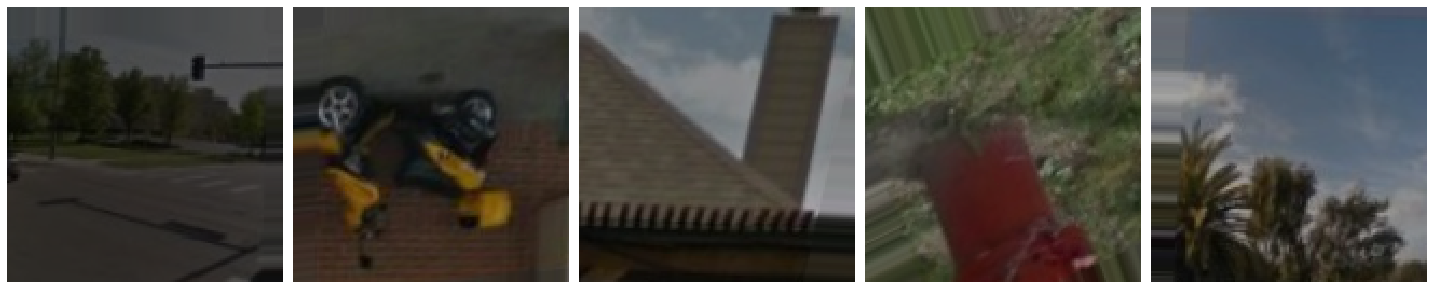

In [3]:
#test danych
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes) :
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    
plotImages(sample_training_images[:5])

In [4]:
#przygotowanie modelu sieci

#model = Sequential([
#    Conv2D(1024, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
#    MaxPooling2D(),
#    Conv2D(256, 3, padding='same', activation='relu'),
#    MaxPooling2D(),
#    Conv2D(512, 3, padding='same', activation='relu'),
#    MaxPooling2D(),
#    Flatten(),
#    Dense(64, activation='relu'),
#    Dense(1, activation='sigmoid')
#])

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

In [5]:
#trenowanie

history = model.fit_generator(
    validation_image_generator.flow(train_data_gen),
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

MemoryError: Unable to allocate array with shape (32, 128, 128, 3) and data type float32

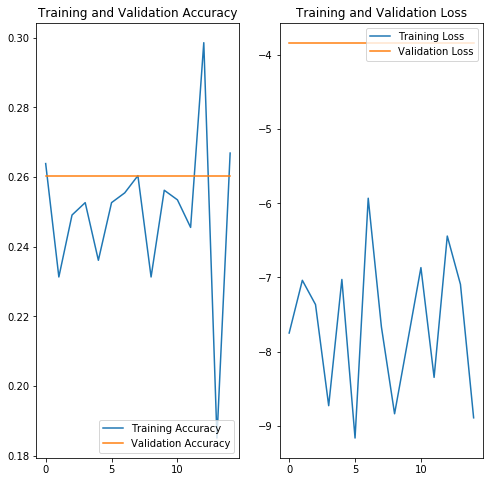

In [5]:
#Podsumowanie wyników

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()